<h1><b><center>Os 50 livros mais vendidos da Amazon de 2009 a 2019</center></b></h1>

---
<font size="2" face="Verdana">Diversos portais recebem avaliações e resenhas de séries, filmes e livros, onde os consumidores expressam suas opiniões sobre as obras e estes mesmos portais, coletam esses dados para medir a qualidade, a aceitação e o impacto causado na sociedade.
    
A **Amazon** é uma empresa multinacional de tecnologia norte-amaericana com sede em Seattle, Washington. É uma organização que concentra seus negócios no e-commerce, sendo uma das cinco grandes empresas de tecnologia, comercializa diversos produtos, pricipalmente livros, Ela é um dos portais que coletam tais dados a fim de entender o que vende mais, o que está mais evidência no mercado e etc. Os dados utilizados nesta análise será especificamente dos 50 livros mais vendidados na Amazon de 2009 a 2019, sendo esta a categoria bestseller.
     
O termo **Bestseller** (do inglês, "Mais Vendido") é comumente utilizado, neste caso, para caracterizar os livros mais vendidos, podendo ser classificados por tipos, autores, listas e etc. Remetendo dessa forma a livros de grande sucesso de um determinado período.


Por: Felipe Alves Cardozo
</font>



<p  align=center><br><img src='https://s3.amazonaws.com/prod.assets.thebanner/styles/article-large/s3/article/large/TunedIn_BooksfromtheBanner_large.jpg?itok=F6iZdPZG' widht='100%'></p>

# Importação dos Dados

<font size="2" face="Verdana">Neste Projeto, irei analisar **Os 50 livros mais vendidos da Amazon de 2009 a 2019** a partir da base de dados disponilizada no kaggle, buscarei uma visão ampla dos dados, respondendo perguntas como:

* Qual o livro mais e menor resenhado?
* Qual a maior e a menor nota atribuída?
* Qual o maior e o menor valor de livro?
    
Além de outras perguntas...
    
Farei também algumas representações gráficas dos dados, seguindo a convenção de **Storytelling**, proposta pela autora Cole Nussbaumer Knaflic, em seu livro de nome **Storytellyng com Dados**
    
Os dados podem ser obtidos clicando neste [Link](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019) </font>

<font size="2" face="Verdana">O primeiro passo é a Importação das bibliotecas a serem utilizadas, no caso do presente projeto, importaremos a biblioteca **Pandas** e a **Matplotlib** </font>

In [1]:
# Importando as Bibliotécas 
import pandas as pd
import matplotlib.pyplot as plt

<font size="2" face="Verdana">O Dataset no qual trabalharei é composto por um arquivo com **Sete** colunas, compondo as informações especificas de livros, das quais tem como significado:

**Dicionário das Variáveis**

1. `Name:` O Nome do Livro
2. `Author:` O Autor do Livro
3. `User Rating:` Classificação do usuário da Amazon
4. `Reviews:` Número de resenhas escritas na Amazon
5. `Price:` Preço do Livro
6. `Year:` Ano de Classificação como bestseller
7. `Genre:` Gênero do Livro (Ficção ou Não Ficção)
    
</font>


In [2]:
# Carregando a base de dados 
df = pd.read_csv("dataset_amazon.csv")

# Exibindo a base de dados
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Análise Exploratória dos Dados

<font size="2" face="Verdana">O Dataset é relativamente pequeno possuindo **550** linhas e **7** colunas, representando dados de **10 anos**, sendo de **2009** à **2019**. 

Aqui existem livros com nomes repetidos, mas com algumas informações diferentes como ano, podendo ser um relançamento ou segunda edição do livro, e a resenha, dessa forma escolhi manter tais informações na análise.</font>

In [3]:
# Exibindo informações de Dimensão dos dados
print("DIMENSÕES DO DATAFRAME:\n")
print(f"O Dataframe possui {df.shape[0]} linhas")
print(f"O Dataframe possui {df.shape[1]} Colunas")

DIMENSÕES DO DATAFRAME:

O Dataframe possui 550 linhas
O Dataframe possui 7 Colunas


<font size="2" face="Verdana">Utilizando o método **info()** vemos que o Dataset possui valores completos, ou seja, não possui valores nulos, este é um resumo mais abrangente das informações dos dados, destacando o índice, o nome, a contagem total de valores não nulos e os tipos de cada coluna, nesta respectiva ordem.</font>


In [4]:
# Imprimindo o resumo geral das informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Com isso, percebemos que os valores da coluna **Price** que correspondem ao preços dos livros estão como valores inteiros, não há nenhum problema nisso, mas é comum que tais valores sejam do tipo float, tornando assim mais condizente com a realidade. Dessa forma fazemos a conversão desses valores, em seguida mostrando que a conversão foi realizada

In [5]:
# Convertendo a coluna Price para valores do tipo Float
df['Price'] = df['Price'].astype(float)
df['Price'].dtypes

dtype('float64')

Em seguida devemos observar se o nosso Dataframe possui algum valor nulo, pois, esse tipo de valor pode impactar negativamente nas análises. Para isso utilizamos o método **isnull()** e somamos todos os valores desse tipo, o resultado é que **não existe nenhum valor nulo** no nosso Dataframe.

In [6]:
# Somando os valores nulos do Dataset
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

A Próxima etapa da análise é a impressão do resumo estatístico das colunas com valores númericos utilizando o método **describe()**, com isso, observamos alguns dados interessantes:

* Vamos primeiramente escolher as colunas correspondentes a valores númericos, descartando a coluna Year (ano), que não faz sentido fazer análise estatística, neste caso.
* É reforçado que todas as linhas estão preenchidas.
* A média, valor mínimo e máximo são apresentadas no resumo, veremos detalhadamente mais a frente.

In [7]:
# Escolhendo as colunas a serem utilizadas e atribuindo a uma variável
estatistica = df[['User Rating', 'Reviews', 'Price']]
estatistica.describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


# Respondendo algumas perguntas

<font size="2" face="Verdana">Agora iremos responder aquelas perguntas principais do início da análise: </font>

## **01 - Qual o livro com maior nota?**

<font size="2" face="Verdana">Como vimos a maior nota do Dataset é **4.9** e alguns livros receberam esta nota, como alguns dito alguns valores aparecem mais de uma vez, então para essa análise deixamos apenas a primeira aparição com base no nome do livro.

Se levarmos em consideração a nota e a quantidade de Reviews, vemos que o livro chamado **Oh, the Places You'll Go!** do autor **Dr. Seuss** foi o que mais de destacou com a nota **4.9** e um total de **21.834** resenhas, tendo sua popularidade em **2012**.</font>

In [8]:
# Atribuindo a uma variável a Maior Nota e removendo valores duplicados
nota_max = df.loc[df['User Rating'] == df['User Rating'].max()]
nota_max = nota_max.drop_duplicates('Name').sort_values('Reviews', ascending=False)
nota_max

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8.0,2012,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30.0,2016,Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8.0,2011,Non Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5.0,2013,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5.0,2017,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8.0,2019,Fiction
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13.0,2018,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22.0,2016,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8.0,2019,Fiction
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6.0,2019,Fiction


## **02 - Qual o livro com Menor nota?**

<font size="2" face="Verdana">Foi atribuida a menor nota, neste caso, **3.3** em apenas um livro chamado **The Casual Vacancy** da autora **J.K. Rowling** conhecida pelo besteseller **Harry Potter**, o livro é primeiro seguinte a esta famosa saga, teve um total de **9.372** resenhas.</font>

In [9]:
# Atribuindo a uma variável a Menor Nota
nota_min = df.loc[df['User Rating'] == df['User Rating'].min()]
nota_min

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12.0,2012,Fiction


## **03 - Qual o livro com a Maior quantidade de Reviews?**

<font size="2" face="Verdana">A maior quantidade de Reviews foi feita para o livro **Where the Crawdads Sing** uma ficção do autor **Delia Owens** com um total de **87.841** resenhas, o livro em questão recebeu a nota 4.8, sendo mais vendido no ano de 2019.</font>

In [10]:
# Atribuindo a uma variável a Maior quantidade de reviews
review_max = df.loc[df['Reviews'] == df['Reviews'].max()]
review_max

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15.0,2019,Fiction


## **04 - Qual o livro com a Menor quantidade de Reviews?**

<font size="2" face="Verdana">A **menor** quantidade de Reviews foi feita para o livro **Divine Soul Mind Body Healing and Transmission System** do autor **Zhi Gang Sha**, uma não-ficção, com um total de **37** resenhas escritas e a nota **4.6**.</font>

In [11]:
# Atribuindo a uma variável a Menor quantidade de reviews
review_min = df.loc[df['Reviews'] == df['Reviews'].min()]
review_min

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6.0,2009,Non Fiction


## **05 - Qual o livro com o Maior Preço?**

<font size="2" face="Verdana">O livro mais caro do dataset é o chamado **Diagnostic and Statistical Manual of Mental Disorders** que custa o valor de **U$105.5**, o alto valor se justifica pois é um livro da área da saúde.</font>

In [12]:
# Atribuindo a uma variável o Maior Preço de livros
preco_max = df.loc[df['Price'] == df['Price'].max()]
preco_max.drop_duplicates('Name')

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105.0,2013,Non Fiction


## **06 - Qual o livro com o Menor Preço?**

<font size="2" face="Verdana">Os livros com menores preços custam o valor de **U$0.0**, o que acaba sendo bem curioso, tais livros podem fazer parte de a promoções onde o livro sai de graça ou algum tipo de cortesia na aquisição de outro livro do mesmo autor, da mesma sequência ou até mesmo um erro no preenchimento do valor. O que é complementado pelo fato de os livros receberem 4 das notas mais altas.</font>

In [13]:
# Atribuindo a uma variável o Menor Preço de livros

preco_min = df.loc[df['Price'] == df['Price'].min()]
preco_min.drop_duplicates('Name')

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0.0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0.0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0.0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0.0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0.0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0.0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0.0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0.0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,2013,Fiction


# Representação Gráfica

<font size="2" face="Verdana">Fazendo um somatório das informações das notas vemos que a maior quantidade de notas atribuidas estão na faixa de **4.8** com **127** avaliações, seguidos de **4.7** e **4.6**, estando **4.9** na quinta posição com **52** avaliações </font>

In [14]:
notas_df = df['User Rating'].value_counts()
notas_df

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: User Rating, dtype: int64

<font size="2" face="Verdana">Colocando tais informações em um gráfico de barras, conseguimos enxergar a diferença entre a quantidade de aplicação das notas, principalmente entre a maior e a menor avaliação, tendo como a maior nota aribuída o valor **4.8**. </font>

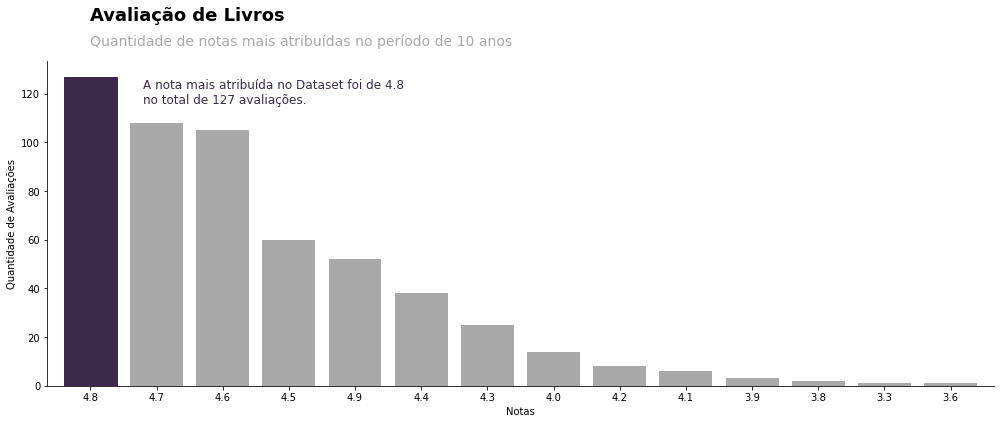

In [21]:
# cores
azul = '#3c2a4d'
cinza = '#a9a9a9'

fig, ax = plt.subplots(figsize=(14,6))

notas_df.plot(kind='bar', width=0.8, ax=ax, color=cinza)

ax.set_ylabel('Quantidade de Avaliações')
ax.set_xlabel('Notas')

# Remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Título
plt.text(0, 150,
        "Avaliação de Livros",
        fontsize=18, 
        color='black',
        weight='bold')

# Subtítulo
plt.text(0, 140,
        "Quantidade de notas mais atribuídas "
        "no período de 10 anos", 
        fontsize=14,
        color=cinza)

# Texto de destaque
plt.text(0.8, 116,
        "A nota mais atribuída no Dataset foi de 4.8\n"
        "no total de 127 avaliações.",
        fontsize=12,
        color=azul)


plt.xticks(rotation = 0, ha='center')
ax.get_children()[0].set_color(azul) 
plt.tight_layout()

<font size="2" face="Verdana">Agora, separamos em um novo Dataframe, os dados referentes as quantidades de reviews por ano e somando tais valores por cada ano.</font>

In [22]:
review_by_year = df[['Reviews','Year']]
review_by_year = review_by_year.groupby('Year').sum()
review_by_year

,Reviews
Year,
2009,235506
2010,273981
2011,405041
2012,654546
2013,654907
2014,792997
2015,711669
2016,709800
2017,644420


<font size="2" face="Verdana">Aplicando a esse novo Dataset um gráfico de linhas, fica evidente que a maior quantidade de Reviews ocorreu no ano de **2019** com um total de **794.917** resenhas, e a segunda maior quantidade de Reviews ocorreu no ano de **2014** com um total de **792.997** resenhas  </font>

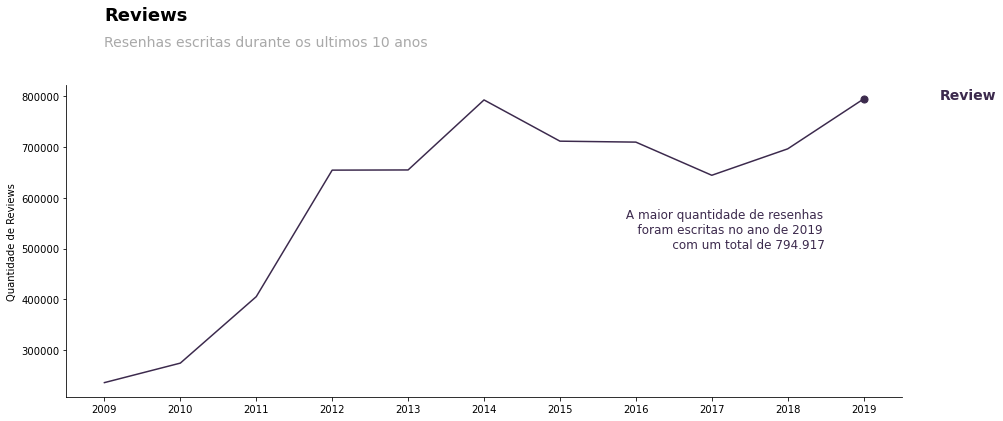

In [23]:
# Plotar o total de reviews ao longo dos anos

fig, ax = plt.subplots(figsize=(14,6))
review_by_year.plot(kind="line", ax=ax, color=azul)
ax.set_ylabel("Quantidade de Reviews")
ax.set_xlabel(None)
ax.set_xticks(df['Year'].unique())
ax.get_legend().remove()

# Remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Legenda
plt.text(2020,794917,
        "Review",
        fontsize=14,
        weight='bold',
        color=azul)

# Título
plt.text(2009, 950000,
        "Reviews",
        fontsize=18, 
        color='black',
        weight='bold')

# Subtítulo
plt.text(2009, 900000,
        "Resenhas escritas durante "
        "os ultimos 10 anos", 
        fontsize=14,
        color=cinza)

# Texto de destaque
plt.text(2015, 500000,
        "                 A maior quantidade de resenhas\n"
        "                    foram escritas no ano de 2019\n"
        "                             com um total de 794.917 Reviews",
        fontsize=12,
        color=azul)

# Adicionando Marcador de dado
ax.scatter(x=2019, y=794917,s=50, color=azul)
#ax.scatter(x=2014, y=792997,s=50, color=azul)

plt.tight_layout()

<font size="2" face="Verdana">O Dataset possui a coluna **Gêneros**, sendo esta composta pelos valores **Fiction**(Ficção) e **Non Fiction**(Não ficção), dessa forma fazendo uma contagem total de cada tipo. </font>

In [24]:
genrs = df['Genre'].value_counts()
genrs

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

<font size="2" face="Verdana"> Em Seguida aplicamos uma representação gráfica dessas informações em um gráfico de barras, separando ficção de não ficção. Do total de 550 livros vemos que temos **310** do gênero de **Não-Ficção** e **240** do gênero **Ficção**.</font>

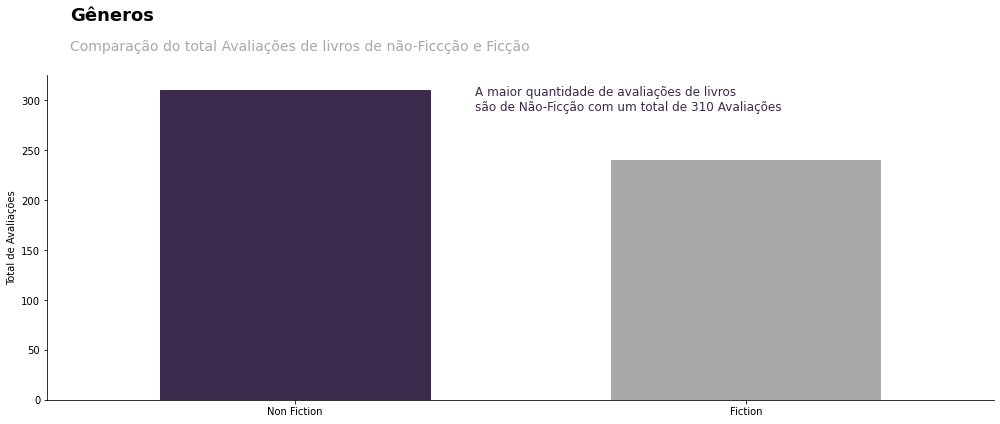

In [25]:
fig, ax = plt.subplots(figsize=(14,6))
#values = ['Não-Ficção','Ficção']

# Plotando o gráfico
genrs.plot(kind='bar', width=0.6, ax=ax, color=cinza)

# Removendo o Grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Título
plt.text(-0.5,380,
        "Gêneros",
        fontsize=18,
        color='black',
        weight='bold')

# Subtítulo
plt.text(-0.5,350,
        "Comparação do total Avaliações de livros de não-Ficcção e Ficção",
        fontsize=14,
        color=cinza)

# Texto em detaque
plt.text(0.4, 290,
        'A maior quantidade de avaliações de livros\n' 
        'são de Não-Ficção com um total de 310 Avaliações',
        fontsize=12,
        color=azul)

#ax.set_title('Total de livros por Gêneros')
ax.set_xlabel(None)
ax.set_ylabel('Total de Avaliações')

ax.get_children()[0].set_color(azul)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

<font size="2" face="Verdana">A próxima análise será focada nas colunas **Price**(preço) e **Year**(Ano), onde, primeiro removemos os livros duplicados a fim de ter uma visão mais acertiva dos valores.</font>

In [26]:
# Selecionando 
price_by_year = df[["Name","Price",'Year']]
price_by_year = price_by_year.drop_duplicates('Name')
price_by_year.drop(['Name'], axis=1)

,Price,Year
0,8.0,2016
1,22.0,2011
2,15.0,2018
3,6.0,2017
4,12.0,2019
...,...,...
538,15.0,2012
539,11.0,2010
540,9.0,2013
545,8.0,2019


<font size="2" face="Verdana">Utilizarei para essa análise um gráfico de dispersão, com isso podemos notar que a maioria dos valores estão abaixo de **30** dolares, sendo uma constância durante todos os anos, além disso, vemos que o livro mais caro está na faixa de **100** dólares. </font>

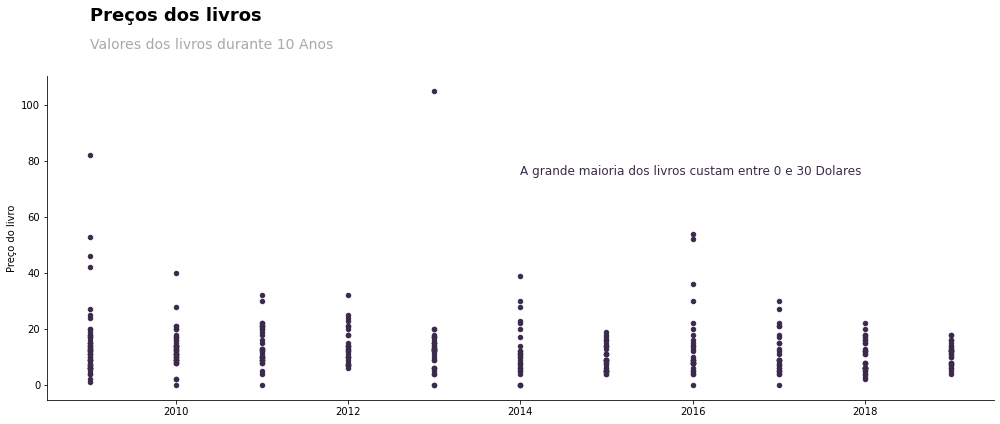

In [32]:
fig, ax = plt.subplots(figsize=(14,6))

# Gráfico de dispersão
price_by_year.plot(x='Year',y='Price',kind='scatter', ax=ax, s=20, c=azul)

# Remover o Grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Label
ax.set_ylabel('Preço do livro')
ax.set_xlabel(None)

# Título
plt.text(2009, 130,
        "Preços dos livros",
        fontsize=18,
        color='black',
        weight='bold')

# Subtítulo
plt.text(2009, 120,
        "Valores dos livros durante 10 Anos",
        fontsize=14,
        color=cinza)

# Texto de destaque
plt.text(2014, 75,
        "A grande maioria dos livros custam entre 0 e 30 Dolares", 
        fontsize=12,
        color=azul)

plt.tight_layout()

# Conclusão

<font size="2" face="Verdana"> Esta análise proporcionou uma visão bem ampla dos dados, com alguns comandos conseguimos obter diversas informações, como os valores máximos e mínimos dos livros da época, os gêneros mais lidos no período de **10 anos**, a quantidade de reviews bem como outras informações.

O objetivo da análise de dados é de enxergar oportunidades e trazer os insights necessários para uma eventual decisão como:
<br><br>
* Investimento em vendas de livros com menores preços, pois estes são os mais vendidos.
* Vemos que os livros de Ficção em comparação com os demais, tem pouca diferença de Reviews, mostrando que são livros muito populares e muito consumidos.
* Permitir que os consumidores façam reviews pode influênciar os demais consumidores a comprarem, bem como em comparação as notas atribuidas.
    
Bem como diversos outros insigths.
  
Com isso concluo a análise.
</font>